# Importing required libraries as well as doing baseline exploratory data analysis:

In [2]:
import pandas as pd #import Pandas
import numpy as np # import NumPy
import matplotlib.pyplot as plt # import Matplotlib
from collections import defaultdict #import defaultdict

In [3]:
df = pd.read_csv('countryVaccinations.csv', float_precision='round_trip') # creates dataframe with the .csv file
pd.set_option("precision", 20) # prevents Pandas from rounding the decimals

In [4]:
df.dtypes #Looking at the datatypes of every column in the overall dataset

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [5]:
df.loc[df.country == 'United States', 'people_vaccinated_per_hundred'] # observing the percent of people vaccinated 
# in the United States over 245 days

37339     0.17000000000000001221
37340     0.17999999999999999334
37341                        NaN
37342     0.29999999999999998890
37343                        NaN
                  ...           
37579    59.47999999999999687361
37580    59.60000000000000142109
37581    59.77000000000000312639
37582    59.92999999999999971578
37583    60.07999999999999829470
Name: people_vaccinated_per_hundred, Length: 245, dtype: float64

In [6]:
df.columns # getting a better understanding of the columns in the dataset that I can possibly index in the future

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [7]:
df.drop(columns = ['iso_code', 'source_name', 'source_website', 'daily_vaccinations_raw', 'total_vaccinations_per_hundred'], inplace = True)
# removing columns that are irrelevant to me for the purpose of this project

In [8]:
df.info()
# getting a better understanding of null values in the dataset
# it appears that columns that require data that aren't repeating (date) or set (country name) are missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39113 entries, 0 to 39112
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              39113 non-null  object 
 1   date                                 39113 non-null  object 
 2   total_vaccinations                   21551 non-null  float64
 3   people_vaccinated                    20604 non-null  float64
 4   people_fully_vaccinated              17728 non-null  float64
 5   daily_vaccinations                   38855 non-null  float64
 6   people_vaccinated_per_hundred        20604 non-null  float64
 7   people_fully_vaccinated_per_hundred  17728 non-null  float64
 8   daily_vaccinations_per_million       38855 non-null  float64
 9   vaccines                             39113 non-null  object 
dtypes: float64(7), object(3)
memory usage: 3.0+ MB


In [9]:
df.describe()
# statistical analysis of the numerical columns in the dataset

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.15510000000000000000e+04,2.06040000000000000000e+04,1.77280000000000000000e+04,3.88550000000000000000e+04,20604.00000000000000000000,17728.00000000000000000000,38855.00000000000000000000
mean,1.66447390159621369094e+07,7.25220954353523626924e+06,4.42408981407942250371e+06,1.26415309355295335990e+05,23.40389536012425963918,16.54879061371852344564,3577.04861665165344675188
std,9.52698823086299598217e+07,2.62149918222410306334e+07,1.57863939189877174795e+07,8.83964124242976889946e+05,23.08545965003144573302,19.34090419270255623019,4603.15343748526356648654
min,0.00000000000000000000e+00,0.00000000000000000000e+00,1.00000000000000000000e+00,0.00000000000000000000e+00,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000
25%,1.67758000000000000000e+05,1.39326500000000000000e+05,6.38700000000000000000e+04,8.52000000000000000000e+02,3.39749999999999996447,1.85000000000000008882,475.00000000000000000000
50%,1.17462400000000000000e+06,8.38499500000000000000e+05,4.94110500000000000000e+05,6.87400000000000000000e+03,14.71000000000000085265,8.14000000000000056843,2112.00000000000000000000
75%,6.15147150000000000000e+06,3.94887350000000000000e+06,2.46278375000000000000e+06,3.92820000000000000000e+04,40.25249999999999772626,25.58249999999999957367,5350.50000000000000000000
max,1.93586900000000000000e+09,6.22000000000000000000e+08,7.77046000000000000000e+08,2.24242860000000000000e+07,116.93000000000000682121,116.26999999999999602096,118759.00000000000000000000


Overall, it appears that vaccination, globally, is not progressing at a substantial rate.
As we saw in line 14, the United States's percent of people vaccinated far exceeds the mean of people vaccinated. 
Relatively, the United States is a much larger country than most other countries and, if it has a higher PERCENT of
people vaccinated, then it has been able to administer more vaccines than most other countries. 
This could possibly be due to the effect that COVID-19 has had on the United States or the prominence of the United
States in the world. 

In [10]:
df_cat = df[['country', 'date', 'vaccines']] 
# seperating the categorical variables in the dataset into a singular dataset

In [11]:
df_num = df[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']]
# seperating the numerical variables in the dataset into a singular dataset

In [12]:
df_cat 
# observing the categorical dataset that was just created

,country,date,vaccines
0,Afghanistan,2021-02-22,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...
39108,Zimbabwe,2021-08-17,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39109,Zimbabwe,2021-08-18,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39110,Zimbabwe,2021-08-19,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39111,Zimbabwe,2021-08-20,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [13]:
df_num
# observing the numerical dataset that was just created

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0.0,0.0,NaN,NaN,0.00000000000000000000,NaN,NaN
1,NaN,NaN,NaN,1367.0,NaN,NaN,35.0
2,NaN,NaN,NaN,1367.0,NaN,NaN,35.0
3,NaN,NaN,NaN,1367.0,NaN,NaN,35.0
4,NaN,NaN,NaN,1367.0,NaN,NaN,35.0
...,...,...,...,...,...,...,...
39108,3450959.0,2145237.0,1305722.0,68200.0,14.42999999999999971578,8.78999999999999914735,4589.0
39109,3542340.0,2193046.0,1349294.0,75000.0,14.75999999999999978684,9.08000000000000007105,5046.0
39110,3620937.0,2233265.0,1387672.0,61097.0,15.02999999999999936051,9.33999999999999985789,4111.0
39111,3699508.0,2271429.0,1428079.0,69346.0,15.27999999999999936051,9.60999999999999943157,4666.0


In [14]:
df_num.info()
# looking at the number of null values and datatypes of each column in the numerical dataset (all of them appear 
# to have null values). This reinforces what I observed previously. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39113 entries, 0 to 39112
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   total_vaccinations                   21551 non-null  float64
 1   people_vaccinated                    20604 non-null  float64
 2   people_fully_vaccinated              17728 non-null  float64
 3   daily_vaccinations                   38855 non-null  float64
 4   people_vaccinated_per_hundred        20604 non-null  float64
 5   people_fully_vaccinated_per_hundred  17728 non-null  float64
 6   daily_vaccinations_per_million       38855 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB


In [15]:
df_cat.info()
# looking at the number of null values and datatypes of each column in the categorical dataset (none of them appear 
# to have null values). This reinforces what I observed previously. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39113 entries, 0 to 39112
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   39113 non-null  object
 1   date      39113 non-null  object
 2   vaccines  39113 non-null  object
dtypes: object(3)
memory usage: 916.8+ KB


In [16]:
df.loc[df.country == 'United States', 'people_vaccinated_per_hundred']
# Once again, I am observing the percent of people vaccinated over 245 days in the United States as I want to see
# how many null values there are. 

37339     0.17000000000000001221
37340     0.17999999999999999334
37341                        NaN
37342     0.29999999999999998890
37343                        NaN
                  ...           
37579    59.47999999999999687361
37580    59.60000000000000142109
37581    59.77000000000000312639
37582    59.92999999999999971578
37583    60.07999999999999829470
Name: people_vaccinated_per_hundred, Length: 245, dtype: float64

In [17]:
df.fillna(value = 0, inplace = True) # Filling the null values in the overall dataset with '0'
df.total_vaccinations = df.total_vaccinations.astype(int) # Setting the datatype of the data under 'total_vaccinations' 
# to the integer datatype
df.people_vaccinated = df.people_vaccinated.astype(int) # Setting the datatype of the data under 'people_vaccinated' 
# to the integer datatype
df.people_fully_vaccinated = df.people_fully_vaccinated.astype(int) # Setting the datatype of the data under 
# 'total_vaccinations' to the integer datatype


df.daily_vaccinations = df.daily_vaccinations.astype(int) # Setting the datatype of the data under 'daily_vaccinations' 
# to the integer datatype


df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.astype(int) # Setting the datatype 
# of the data under 'people_fully_vaccinated' to the integer datatype
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.astype(int) # Setting the datatype of the data 
# under 'daily_vaccinations_per_million' to the integer datatype
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.astype(float) # Setting the datatype of the data 
# under 'people_vaccinated_per_hundred' to the float datatype

In [18]:
df.loc[df.country == 'United States', 'people_vaccinated_per_hundred']
# Checking to make sure that the null values were converted to zero

37339     0.17000000000000001221
37340     0.17999999999999999334
37341     0.00000000000000000000
37342     0.29999999999999998890
37343     0.00000000000000000000
                  ...           
37579    59.47999999999999687361
37580    59.60000000000000142109
37581    59.77000000000000312639
37582    59.92999999999999971578
37583    60.07999999999999829470
Name: people_vaccinated_per_hundred, Length: 245, dtype: float64

<AxesSubplot:xlabel='date'>

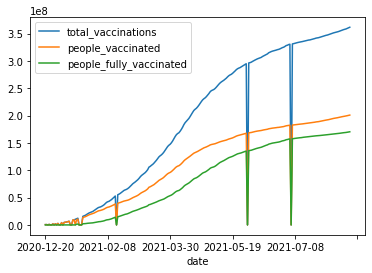

In [19]:
df.loc[df.country == 'United States', ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'date']].plot(x = 'date')
# Using Matplotlib to plot the relationship between date and total vaccinations, people vaccinated, and people fully vaccinated 

In [20]:
df.loc[df.country == 'United States', 'total_vaccinations']
# Looking at the total number of cumulative vaccinations for the United States over a 245-day period

37339       556208
37340       614117
37341            0
37342      1008025
37343            0
           ...    
37579    357894995
37580    358599835
37581    359623380
37582    360634287
37583    361684564
Name: total_vaccinations, Length: 245, dtype: int64

In [21]:
df # looking at the overall dataset once again to make sure that the column of
# "people_vaccinated_per_hundred" has float values

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0,0,0,0,0.00000000000000000000,0,0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...,...
39108,Zimbabwe,2021-08-17,3450959,2145237,1305722,68200,14.42999999999999971578,8,4589,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39109,Zimbabwe,2021-08-18,3542340,2193046,1349294,75000,14.75999999999999978684,9,5046,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39110,Zimbabwe,2021-08-19,3620937,2233265,1387672,61097,15.02999999999999936051,9,4111,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39111,Zimbabwe,2021-08-20,3699508,2271429,1428079,69346,15.27999999999999936051,9,4666,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [22]:
len(df.country.unique()) # finding the number of unique countries there are in the dataset

222

In [23]:
len(df) # finding the number of rows in the dateset

39113

In [24]:
df.daily_vaccinations[1] # quickly indexing the dataframe to see second entry in the 'daily vaccinations column'

1367

# Which countries have the highest number of vaccinated people? 

In [25]:
total_vaccinated = {} # initializing the dictionary

for country in df.country.unique() : # using a for loop to pick out the individual countries and assign the number of
    vaccinated = 0 # vaccinated people to zero

    for i in range(len(df)) : # looping through all the rows in the overall dataset
        if df.country[i] == country : # going through all the rows and picking the rows that have a 'country' value equivalent to the country of interest at that time
            vaccinated += df.daily_vaccinations[i] # adding the value of 'daily_vaccinations' in the rows that were chosen to the overall value of vaccinated for that particular country
    
    total_vaccinated[country] = vaccinated # creating dictionary values in total_vaccinated where the country is the key and the vaccinated number is the value
    
    total_vaccinated_df = pd.DataFrame.from_dict(total_vaccinated, # convering the dictionary we created to a dataframe 
                                                         orient='index',
                                                         columns = ['total_vaccinated_till_date']) 

total_vaccinated_df.sort_values(by = 'total_vaccinated_till_date', ascending = False, inplace = True) # sorting the values in the dataframe in descending order (greatest to least)

total_vaccinated_df # looking at the overall dataframe that was just created

,total_vaccinated_till_date
China,1898830643
India,562265410
United States,358727323
Brazil,167579290
Japan,111835489
...,...
Tuvalu,1860
Tokelau,1045
Pitcairn,38
Bonaire Sint Eustatius and Saba,0


We can see that China, India, and the United States have the highest number of vaccinated people till date. 
Let us take a look at how the number of daily vaccinations differ between each of these countries: 

Text(0, 0.5, 'daily vaccination count (millions)')

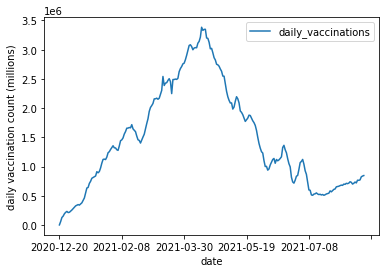

In [26]:
df.loc[df.country == 'United States', ['daily_vaccinations', 'date']].plot(x = 'date') # plotting date vs. daily vaccinations for the United States
plt.ylabel('daily vaccination count (millions)') # defining the y-axis 

Text(0, 0.5, 'daily vaccination count (tens of millions)')

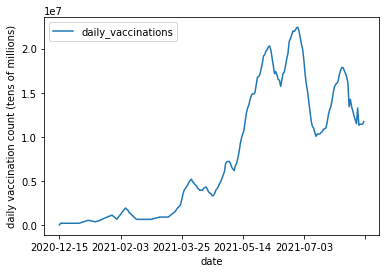

In [27]:
df.loc[df.country == 'China', ['daily_vaccinations', 'date']].plot(x = 'date', y = 'daily_vaccinations') # plotting date vs. daily vaccinations for China
plt.ylabel('daily vaccination count (tens of millions)') # defining the y-axis 

Text(0, 0.5, 'daily vaccination count (millions)')

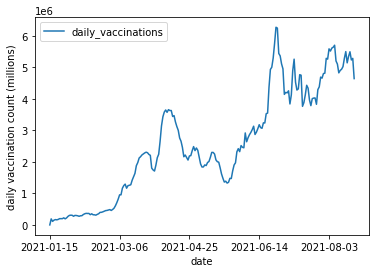

In [28]:
df.loc[df.country == 'India', ['daily_vaccinations', 'date']].plot(x = 'date', y = 'daily_vaccinations') # plotting date vs. daily vaccinations for India
plt.ylabel('daily vaccination count (millions)') # defining the y-axis 

We can see that China has drastically increased the number of vaccinations in their country as they have daily 
vaccination rates that exceed India and the United States by approximately 10-15 million. 
India comes second as they have daily vaccination rates of approximately 3 million. However, India recently received
an influx of vaccines and this might be a reason wby they trail behind China in their number of daily vaccinations. 
Lastly, the United States has a daily vaccination rate of approximately 2 million. It appears that the United States 
had a singular increase in daily vaccinations when the vaccine was released to everyone, which then fell after vaccien
after approximately 30-40 percent of the population received the vaccine. 

Text(0, 0.5, 'daily vaccinations count (tens of millions)')

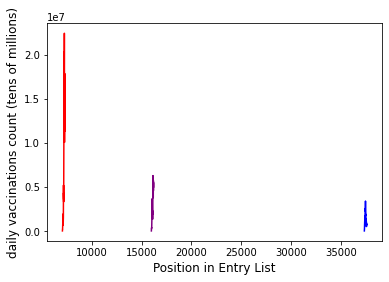

In [29]:
India = df.loc[df.country == 'India', ['daily_vaccinations']] # Setting the number of daily_vaccinations per day to a variable named 'India'
China = df.loc[df.country == 'China', ['daily_vaccinations']] # Setting the number of daily_vaccinations per day to a variable named 'China'
US = df.loc[df.country == 'United States', ['daily_vaccinations']] # Setting the number of daily_vaccinations per day to a variable named 'US'
plt.plot(India, color = 'purple') # Plotting the number of daily vaccinations for India (purple-colored) using Matplotlib
plt.plot(China, color = 'red') # Plotting the number of daily vaccinations for China (purple-colored) using Matplotlib
plt.plot(US, color = 'blue') # Plotting the number of daily vaccinations for the U.S. (purple-colored) using Matplotlib
plt.xlabel("Position in Entry List", fontsize=12) # setting the x-axis to 'Position in Entry List' with a font size of 12
plt.ylabel("daily vaccinations count (tens of millions)", fontsize=12) # setting the y-axis to 'daily vaccinations count (tens of millions)' with a font size of 12

# What country has the highest percentage of vaccinated people?

In [30]:
df.loc[df.country == 'United States', 'people_vaccinated_per_hundred'] # Observing the percent of people vaccinated
# in the United States before doing analysis on the percent of people vaccinated in each country

37339     0.17000000000000001221
37340     0.17999999999999999334
37341     0.00000000000000000000
37342     0.29999999999999998890
37343     0.00000000000000000000
                  ...           
37579    59.47999999999999687361
37580    59.60000000000000142109
37581    59.77000000000000312639
37582    59.92999999999999971578
37583    60.07999999999999829470
Name: people_vaccinated_per_hundred, Length: 245, dtype: float64

In [31]:
percent = {} # initializing a dictionary

for country in df.country.unique() : # creating a for loop that gathers each individual country
    percentage = 0.00 # setting the percentage to 0 (set to change as time goes on)

    for i in df.loc[df.country == country, 'people_vaccinated_per_hundred'] : # creating a for loop that iterates through the percent of people vaccinated in the country 
        percentage_maybe = i # objectifying the percent of people vaccinated in the country
        if i > percentage: # setting the percentage to i if it is larger than the previous percentage (as the data is cumulative)
            percentage = i


    
    percent[country] = percentage # creating values in the 'percent' dictionary where the key is the country and the value is the percentage

    percent_vaccinated_df = pd.DataFrame.from_dict(percent,
                                                         orient='index',
                                                         columns = ['percent_vaccinated'])
#     converted dict to df 
percent_vaccinated_df.sort_values(by = 'percent_vaccinated', ascending = False, inplace = True) # sorting the values in the dataframe in descending order (greatest to least)

percent_vaccinated_df # viewing the dataframe

,percent_vaccinated
Gibraltar,116.93000000000000682121
Pitcairn,100.00000000000000000000
Malta,93.00000000000000000000
United Arab Emirates,84.20000000000000284217
Iceland,80.64000000000000056843
...,...
Tanzania,0.36999999999999999556
Burkina Faso,0.26000000000000000888
Chad,0.20000000000000001110
Haiti,0.20000000000000001110


We can see that Gibraltar, Pitcairn, and Malta are the countries that have the highest percent of people 
vaccinated in the world. This could be due to a number of reasons, however. For instance, these countries could have
relatively smaller populations or these countries might have less sentiment on vaccination. We can also see that 
Gibraltar has a percent that is higher than 100. Because of how a percentage is formulated, this must be an error
in the original data set. We will assume, for the purposes of this project, that the percent of people vaccinated in
Gibraltar is 100. Lastly, it is evident that poorer, less developed countries have a smaller percent of vaccinated people. This could possibly be that they do not have the resources needed to obtain vaccines or it is harder to inform the general public about vaccine availability. Let us see how the daily vaccination rate differs between the countries that have the highest vacciation percentages: 

Text(0, 0.5, 'Daily vaccinations (in hundreds)')

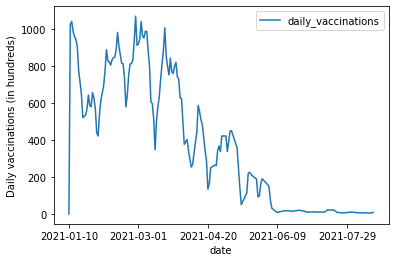

In [32]:
df.loc[df.country == 'Gibraltar', ['daily_vaccinations', 'date']].plot(x = 'date', y = 'daily_vaccinations') # gathering the number of daily vaccinations and the respective date as well as plotting it 
plt.xlabel('date') # setting the x-axis label to 'date'
plt.ylabel('Daily vaccinations (in hundreds)') # setting the y-axis label to 'Daily vaccinations (in hundreds)'

Text(0, 0.5, 'Daily vaccinations (in ones) ')

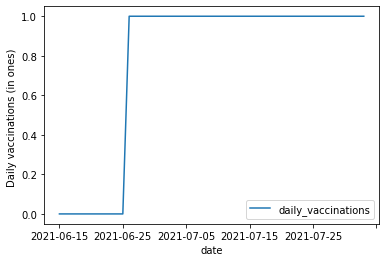

In [33]:
df.loc[df.country == 'Pitcairn', ['daily_vaccinations', 'date']].plot(x = 'date', y = 'daily_vaccinations') # gathering the number of daily vaccinations and the respective date as well as plotting it 
plt.xlabel('date') # setting the x-axis label to 'date'
plt.ylabel('Daily vaccinations (in ones) ') # setting the y-axis label to 'Daily vaccinations (in ones)'

Text(0, 0.5, 'Daily vaccinations (in thousands) ')

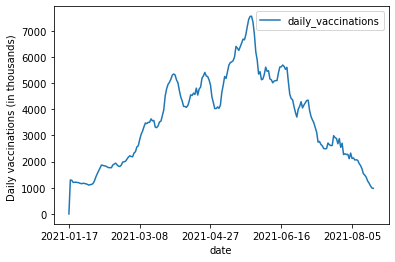

In [34]:
df.loc[df.country == 'Malta', ['daily_vaccinations', 'date']].plot(x = 'date', y = 'daily_vaccinations') # gathering the number of daily vaccinations and the respective date as well as plotting it 
plt.xlabel('date') # setting the x-axis label to 'date'
plt.ylabel('Daily vaccinations (in thousands) ') # setting the y-axis label to 'Daily vaccinations (in thousands) '

First, we can see that the certain countries have smaller populations than other countries do. For example, Pitcairn has a population of around 38 as a singular person got vaccinated from July to present-day. On the other hand, Malta and Gibraltar have much larger populations as their daily vacciation count is in the hundreds/thousands. Overall, it is evident that countries with smaller populations can easily vaccinate their entire population. Despite the large difference in population between these three countries, they still have relatively small populations in comparison to larger countries such as China, India, or the United States. Nevertheless, vaccinating the entire population is no small acheivement as it decreases the risk factor and improves the health of the people in the country. In the future, it is safe to assume that these countries will have fewer deaths from the coronavirus and fewer implications. 

# What vaccines are generally used in which countries?

In [35]:
df_cat # observing the columns that contain categorical data before doing analysis on frequently used vaccines in various countries

,country,date,vaccines
0,Afghanistan,2021-02-22,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...
39108,Zimbabwe,2021-08-17,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39109,Zimbabwe,2021-08-18,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39110,Zimbabwe,2021-08-19,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39111,Zimbabwe,2021-08-20,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [36]:
df_vaccines = pd.read_csv('country_vaccinations_by_manufacturer.csv') # importing the CSV file 'country_vaccinations_by_manufacturer.csv' to a Pandas dataframe
df_vaccines # observing the newly-created dataframe

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31096
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
12472,Uruguay,2021-08-20,Pfizer/BioNTech,1777237
12473,Uruguay,2021-08-20,Sinovac,3242561
12474,Uruguay,2021-08-21,Oxford/AstraZeneca,86548
12475,Uruguay,2021-08-21,Pfizer/BioNTech,1779916


In [37]:
df_vaccines.loc[df_vaccines.location == 'United States', 'vaccine'] # Quickly indexing the dataframe to observe the
# format closer

11354            Moderna
11355    Pfizer/BioNTech
11356            Moderna
11357    Pfizer/BioNTech
11358            Moderna
              ...       
11944            Moderna
11945    Pfizer/BioNTech
11946    Johnson&Johnson
11947            Moderna
11948    Pfizer/BioNTech
Name: vaccine, Length: 595, dtype: object

In [38]:
vaccines = [] # creating a vaccines list
countries = [] # creating a countries list
temp = [] # creating a temporary list
temp_2 = [] # creating a second temporary list


for vaccine in df_vaccines.vaccine.unique(): # selecting all the unique vaccines in the dataframe and appending it to 'vaccines'
    vaccines.append(i)
    
for country in df_vaccines.location.unique() : # selecting all the unique countries in the dataframe and appending it to 'countries'
    countries.append(country)

for i in countries: # selecting all the countries in the 'countries' list
    for c in df_vaccines.loc[df_vaccines.location == i, 'vaccine']: # inside the loop, selecting all the vaccines that have the country represented with index i associated with them
        temp.append([i, c]) # appending the country and their associated vaccine to the 'temp' list
           
for i in temp: # selecting all the elements in temp
    if i not in temp_2: # eliminating repetitive entries by appending all the unique entries in temp to temp_2
        temp_2.append(i)

def convert_vaccine_list(list_of_lists): # created a function that accepts a parameter
    vaccine_dict = {} # intialized a dictionary
    for record in list_of_lists: # selecting every record in the parameter (the parameter is a list of lists)
        if record[0] in vaccine_dict: # checking if the country name is already in the dictionary and creating and adding to an existing key if True
            vaccine_dict[record[0]].append(record[1])
        else: # if the country name is not already in the dictionary, then a new key and value pair will be created with the key representing the country and value representing a vaccine adminstered
            vaccine_dict[record[0]] = [record[1]]
    return vaccine_dict # returning the dictionary created

dictionary = convert_vaccine_list(temp_2) # calling the function that we created and passing 'temp_2' as the parameter


vaccineUse_df = pd.DataFrame.from_dict(dictionary,
                                                orient='index',
                                                columns = ['vaccines_used','accines_used','ccines_used',
                                                           'cines_used','ines_used','nes_used', ]) # converting the dictionary to a Pandas dataframe with six unique columns
# so that we can delete all the irrelevant, repeating columns that will inevitably be created after combining their respective values

vaccineUse_df['vaccines_used'] = vaccineUse_df[vaccineUse_df.columns[0:]].apply( # using a lambda to combine all values in the columns in the datframe
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)



vaccineUse_df.drop(['accines_used', 'ccines_used', 'cines_used', 'ines_used', 'nes_used'], axis = 1, inplace = True) # eliminating the columns that are no longer needed in the dataframe

In [39]:
vaccineUse_df # observing the newly created dataframe to ensure compliance and proper structure

,vaccines_used
Austria,"Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfi..."
Belgium,"Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfi..."
Bulgaria,"Pfizer/BioNTech,Moderna,Oxford/AstraZeneca,Joh..."
Chile,"Pfizer/BioNTech,Sinovac,Oxford/AstraZeneca,Can..."
Croatia,"Pfizer/BioNTech,Johnson&Johnson,Moderna,Oxford..."
Cyprus,"Pfizer/BioNTech,Moderna,Oxford/AstraZeneca,Joh..."
Czechia,"Pfizer/BioNTech,Moderna,Oxford/AstraZeneca,Joh..."
Denmark,"Pfizer/BioNTech,Moderna,Oxford/AstraZeneca,Joh..."
Estonia,"Pfizer/BioNTech,Moderna,Oxford/AstraZeneca,Joh..."
Finland,"Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfi..."


We can see that certain countries use vaccines from more manufacturers than others. For example, Hong Kong uses vaccines from three different manufacturers, while Austria uses vaccines from almost all the manufacturers. Typically, vaccines from manufacturers such as Sinovac are adminstered in Eastern countries and less-developed countries. This can be seen as Hong Kong (an Eastern country) and Chile (a less-developed country) administer Sinovac vaccines. On the other hand, most of the more-developed countries as well as most of the less-developed countries adminster the Moderna and Pfizer/BioNTech vaccines. This could possibly be due to the abudance of these vaccines as well as the early approval of these vaccines for emergency use. Additionally, the Oxford/AstraZeneca vaccine is highly prevalent in coutries located in Europe. Apart from countries like Liechtenstein and Switzerland, all countries pictured above in Europe adminster the Oxford/AstraZeneca vaccine. However, the vaccine is not administered in the United States, Japan, and Hong Kong. This might possibly be due to sentiment on using vaccines that are foreign made or an unneccesity. For example, most of Hong Kong's population is vaccinated, and so there is no need to introduce additional vaccines. The United States uses vaccines that have been developed domestically, so the Oxford/AstraZeneca vaccine would not be feasible. 

# Which countries have the lowest number of vaccinated people? 

In [40]:
df # familiarizing myself once again with the dataframe before starting

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0,0,0,0,0.00000000000000000000,0,0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...,...
39108,Zimbabwe,2021-08-17,3450959,2145237,1305722,68200,14.42999999999999971578,8,4589,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39109,Zimbabwe,2021-08-18,3542340,2193046,1349294,75000,14.75999999999999978684,9,5046,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39110,Zimbabwe,2021-08-19,3620937,2233265,1387672,61097,15.02999999999999936051,9,4111,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39111,Zimbabwe,2021-08-20,3699508,2271429,1428079,69346,15.27999999999999936051,9,4666,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [46]:
dict = {} # initializing a dictionary

for country in df.country.unique(): # selecting each individual country
    vaccinated = 0 # defining the number of vaccinated people (subject to change)
    for i in range(len(df)): # parsing through all the rows
        if df.country[i] == country: # selecting rows that have a 'country' identifier equivalent to the current country of interest
            vaccinated += df.daily_vaccinations[i] # adding the number of daily vaccinations to the total (vaccinated)
    dict[country] = vaccinated # adding all the values to the dictionary

    vaccinated_df = pd.DataFrame.from_dict(dict, orient = 'index', columns = ['total_vaccinated']) # converting the dictionary into a Pandas dataframe

vaccinated_df.sort_values(by = 'total_vaccinated', ascending = True, inplace = True) # sorting the values in the column 'total_vaccinated' by magnitude in ascending order

vaccinated_df # observing the newly created dataframe

,total_vaccinated
Turkmenistan,0
Bonaire Sint Eustatius and Saba,0
Pitcairn,38
Tokelau,1045
Tuvalu,1860
...,...
Japan,111835489
Brazil,167579290
United States,358727323
India,562265410


<AxesSubplot:xlabel='date'>

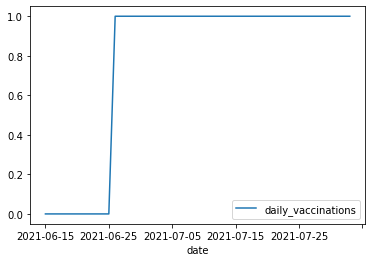

In [49]:
df.loc[df.country == 'Pitcairn', ['daily_vaccinations', 'date']].plot(x = 'date', y = 'daily_vaccinations') # gathering the number of daily vaccinations and the respective date as well as plotting it 

We can see that Turkmenistan, Bonaire Sint Eustatius and Saba, and Pitcairn are some of the countries with the lowest
number of vaccinated people. As we saw a while back, Pitcairn's population consists of approximately 38 people.
Because of this, while they are the bottom of the list for total vaccinations, they are at the top for the percent of 
people vaccinated. On the other hand, the people of coutries such as Turkmenistan and Bonaire Sint Eustatius and Saba have not received 
have not received any vaccinations yet. These countries are relatively larger in population compared to Pitcairn. These
countries are not well-known globally and they are not prominent. This could be one of the main reasons as to why vaccination
has not started there (as they do not produce vaccines either). Hopefully, once vaccination picks up in other places, additional
vaccines can be provided to places that have not started giving out vaccines and are relatively behind (excluding countries with
small populations and a high percentage of people vaccinated). 

# What countries have the lowest percentage of vaccinated people? 

In [51]:
df # familiarizing myself once again with the dataframe before starting

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0,0,0,0,0.00000000000000000000,0,0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,0,0,0,1367,0.00000000000000000000,0,35,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
...,...,...,...,...,...,...,...,...,...,...
39108,Zimbabwe,2021-08-17,3450959,2145237,1305722,68200,14.42999999999999971578,8,4589,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39109,Zimbabwe,2021-08-18,3542340,2193046,1349294,75000,14.75999999999999978684,9,5046,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39110,Zimbabwe,2021-08-19,3620937,2233265,1387672,61097,15.02999999999999936051,9,4111,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."
39111,Zimbabwe,2021-08-20,3699508,2271429,1428079,69346,15.27999999999999936051,9,4666,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac..."


In [56]:
dictionary = {} # nitializing the dictionary

for country in df.country.unique(): # selecting every unique country in the dataframe
    percent = 0 # defining the percent (subject to change)
    for i in df.loc[df.country == country, 'people_vaccinated_per_hundred']: # selecting every single entry for a particular country in the 'people_vaccinated_per_hundred' column
        percent_maybe = i # setting the possible percent to i
        if percent_maybe > percent: # a conditional statement checking if percent_maybe is greater than percent
            percent = percent_maybe # if True, percent becomes percent_maybe
    dictionary[country] = percent # creating values in the dictionary in which the key is the country and the percent is the value
    
    df_percent = pd.DataFrame.from_dict(dictionary, orient = 'index', columns = ['Percent vaccinated']) # converting the dictionary into a Pandas dataframe
    
                                        
df_percent.sort_values(by = 'Percent vaccinated', ascending = True, inplace = True) # sorting the values in the 'Percent vaccinated' column in ascending order

df_percent # observing the newly created dataframe

,Percent vaccinated
Democratic Republic of Congo,0.08999999999999999667
Haiti,0.20000000000000001110
Chad,0.20000000000000001110
Burkina Faso,0.26000000000000000888
Tanzania,0.36999999999999999556
...,...
Iceland,80.64000000000000056843
United Arab Emirates,84.20000000000000284217
Malta,93.00000000000000000000
Pitcairn,100.00000000000000000000


We can see that the Democratic Republic of Congo, Haiti, and Chad have the lowest percent of vaccinated people in the world. Let us take a closer look into the number of daily vaccinations from approximately April to present-day.

<AxesSubplot:xlabel='date'>

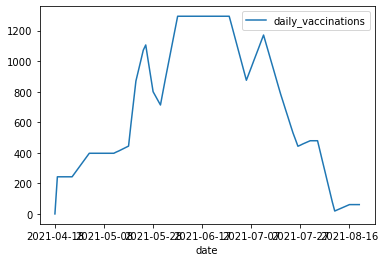

In [62]:
df.loc[df.country == 'Democratic Republic of Congo', ['daily_vaccinations', 'date']].plot(x = 'date', y = 'daily_vaccinations') 
# gathering the number of daily vaccinations and the respective date as well as plotting it 

<AxesSubplot:xlabel='date'>

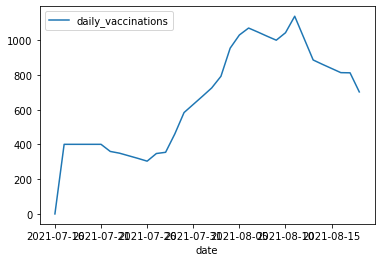

In [63]:
df.loc[df.country == 'Haiti', ['daily_vaccinations', 'date']].plot(x = 'date', y = 'daily_vaccinations')
# gathering the number of daily vaccinations and the respective date as well as plotting it 

<AxesSubplot:xlabel='date'>

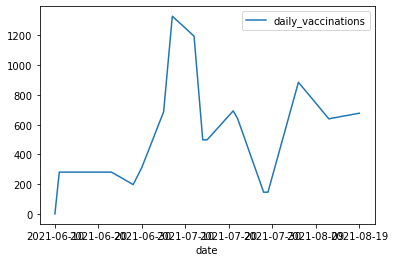

In [64]:
df.loc[df.country == 'Chad', ['daily_vaccinations', 'date']].plot(x = 'date', y = 'daily_vaccinations')
# gathering the number of daily vaccinations and the respective date as well as plotting it 

As said before, the Democratic Republic of Congo, Haiti, and Chad are the coutries with the lowest percentage of vaccinated people. However, they greatly differ in their respective percentages. We can see that approximately 0.09 percent of the citizens in the Democratic Republic of Congo are vaccinated, while approximately 0.20 percent of the citizens in Haiti and Chad are vaccinated. These are alarmingly small percentages, and they go to show that these countries have not been receiving their "fair share" of vaccines. As we have seen before, underdeveloped and poorer countries do not have an abundance of vaccines and struggle to purchase/administer these vaccines. Looking at the bottom five coutries, we can see that four of them are situated in Africa - the world's poorest continent. Unfortunately, because of these countries' lack of wealth and prominence in world affairs, they will not be able to administer vaccines to the people of their countries anytime soon. Despite this sad truth, hopefully other countries that have an abundance of vaccines (United States, China, etc.) contribute additional vaccines to these underprivileged countries. We can also see patterns in the line graphs that have been plotted above. For the Republic of Congo, there were three sharp spikes and decreases in the number of daily vaccinations. Now, unfortunately, the number of daily vaccines has significantly gone down. For Haiti, we can also see that the highest rate of daily vaccinations was in mid-August, and, now, the daily vaccination rate is decreasing. Similarly, for Chad, we can see that there was a large spike sometime in July and then August, but, now, that rate has decreased and has not significantly increased. In conclusion, many different factors affect different statistics that are present in the overall dataset. In general, it is evident that underdeveloped countries and poorer countries are at the bottom of these lists, while developed countries, especially countries in which COVID-19 is more prominent in, are higher up in these lists. This project helped me to get a better understanding of vaccination around the world, and it has helped me to visualize it as well. Hopefully, other people will find this somewhat useful and expand their knowledge on vaccination in different continents/regions in the world. With the development of vaccines and the increased avaiability of them, hopefully we can bring an end to this pandemic. 